# Prototype #2 voice assistant

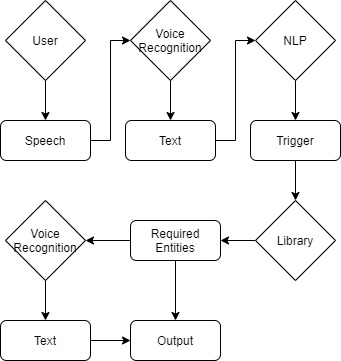

##### Voice recognition

In [40]:
import numpy
import apiai
import speech_recognition as sr
import ifcopenshell 
from os.path import join
from pprint import pprint

In [20]:
def find_nth(string, substring, n):
   if (n == 1):
       return string.find(substring)
   else:
       return string.find(substring, find_nth(string, substring, n - 1) + 1)

def colored(r, g, b, text):
    return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)

In [4]:
excel_file = join('../data/ifc_files/', 'one_wall.ifc')
# excel_file

model = ifcopenshell.open("./data/ifc_files/one_wall.ifc")
model

In [5]:
walls = model.by_type("IfcWall")
walls

[#45=IfcWallStandardCase('3vB2YO$MX4xv5uCqZZG05x',#2,'Wall xyz','Description of Wall',$,#46,#51,$)]

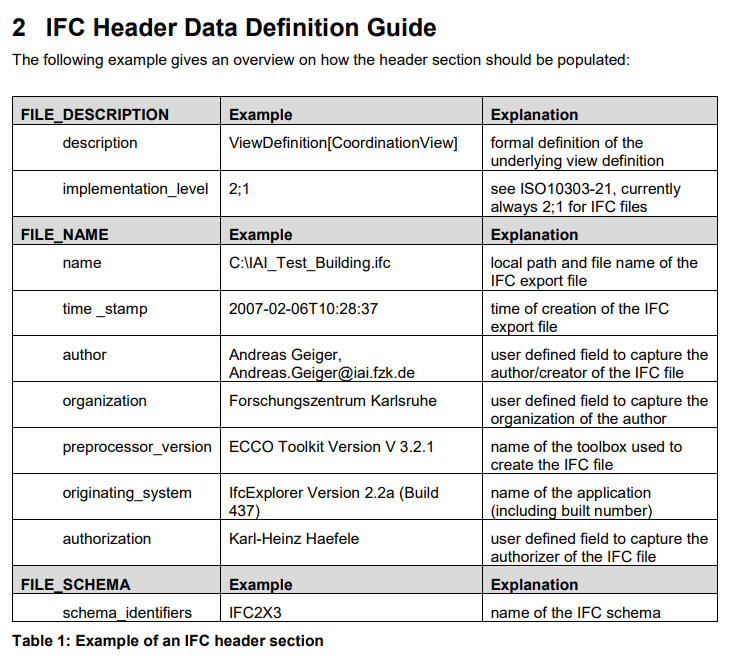

In [46]:
with open('./data/ifc_files/one_wall.ifc') as myFile:
  ifc_text = myFile.read()
  file_description = ifc_text[ifc_text.find('FILE_DESCRIPTION')+len('FILE_DESCRIPTION'):find_nth(ifc_text, ");", 1) + 1]
  file_name = ifc_text[ifc_text.find('FILE_NAME ')+len('FILE_NAME '):find_nth(ifc_text, ");", 2) + 1]
  file_schema = ifc_text[ifc_text.find('FILE_SCHEMA')+len('FILE_SCHEMA'):find_nth(ifc_text, ");", 3) + 1]

print (colored(0, 250, 250, " file_description is: "),file_description,colored(0, 250, 250, "\n\n file_name is: "), file_name,colored(0, 250, 250, "\n\n file_schema is: ") , file_schema)

 file_description is:    (('ViewDefinition [CoordinationView, 
  QuantityTakeOffAddOnView]'), '2;1') 

 file_name is:   ('hello_rwth.ifc', '2015-12-01T21:53:56', 
  ('Architect'), ('Building Designer Office'), 
  'Your favorite text editor', 
  'your text editor version x.x', 'The authorising person') 

 file_schema is:    (('IFC2X3'))


In [68]:
print(file_name)
# data = file_name.split(",")
# print(data[-1])
# # input = [x.replace('\n', '') for x in data]
# # print (input)
type(file_name)
data = file_name.split(",")

data[0]

file_name_dict = {'name': data[0], 'time_stamp': data[1], 'author': data[2], 'organization': data[3], 'preprocessor_version': data[4], 'originating_system': data[5], 'authorization': data[6]}

file_name_dict

('hello_rwth.ifc', '2015-12-01T21:53:56', 
  ('Architect'), ('Building Designer Office'), 
  'Your favorite text editor', 
  'your text editor version x.x', 'The authorising person')


{'name': "('hello_rwth.ifc'",
 'time_stamp': " '2015-12-01T21:53:56'",
 'author': " \n  ('Architect')",
 'organization': " ('Building Designer Office')",
 'preprocessor_version': " \n  'Your favorite text editor'",
 'originating_system': " \n  'your text editor version x.x'",
 'authorization': " 'The authorising person')"}

In [ ]:
file_schema

In [ ]:
file_name

In [55]:
with open('./data/ifc_files/one_wall.ifc') as myFile:
  text = myFile.read()

type(text)
data = text.split(");")

type(data)
data[2]


# input = [x.replace('\n', '') for x in data]

# input[0]
# converted_list = []

# for element in result:
#     converted_list.append(element.strip())

# converted_list

"\nFILE_SCHEMA (('IFC2X3')"

In [ ]:
with open('the-zen-of-python.txt') as f:
    for line in f:
        print(line)

In [49]:

sample_list = ["a", "b\n", "c\n"]
converted_list = []

for element in sample_list:
    converted_list.append(element.strip())

print(converted_list)
converted_list

['a', 'b', 'c']


['a', 'b', 'c']

In [ ]:
r = sr.Recognizer()
mic = sr.Microphone()
with mic as source:
    r.adjust_for_ambient_noise(source, duration=1)
    audio = r.listen(source)
    
r.recognize_google(audio)

#### Example #1 Opening the ifc file

In [ ]:
from IPython.display import Video

video_1 = Video('./data/videos/1.mp4', html_attributes="autoplay")
video_1

In [ ]:
text = "open the file"

##### NLP

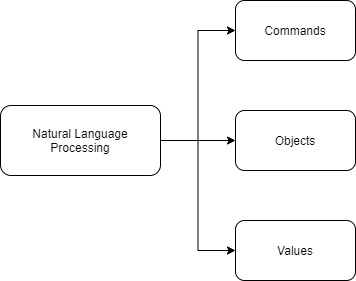

In [ ]:
def trigger_finder(text, commands):
    word_set = set(commands)
    phrase_set = set(text.split())
    if word_set.intersection(phrase_set):
        trigger = word_set.intersection(phrase_set)
        return trigger

In [ ]:
commands = ['open', 'create', 'delete']

In [ ]:
trigger = trigger_finder(text, commands)
trigger

##### IFC

In [ ]:
import os
os.startfile("C:\Users\srate\repos\voice_assistant\RWTHViewer\RWTHViewer\RWTHViewer.exe")

In [ ]:
if trigger == "open":
    ifc_viewer_command = ifcopenshell.open("./hello_reiff_2021.ifc")

In [ ]:
%%html
<iframe src="https://www.ifcviewer.de/?id=61b65bb84f88c63620163c0a&file=hello_reiff_2021.ifc" width="520" height="500"></iframe>

Mit der in diesem Notebook verfügbaren Helfer-Klasssen `JupyterIFCRenderer` kann das geladene Modell eingebettet im Notebook angezeigt werden.

In [ ]:
from utils.JupyterIFCRenderer import JupyterIFCRenderer
viewer = JupyterIFCRenderer(m, size=(400,300))
viewer

#### Example #2 Changing the wall's color

In [ ]:
from IPython.display import Video

# Video("test.mp4")
video_1 = Video('./data/videos/2.mp4', html_attributes="autoplay")
video_1

In [ ]:
text = 'change the color to green'

In [ ]:
colors = ['red', 'blue', 'green']

In [ ]:
trigger = trigger_finder(text, colors)
trigger

In [ ]:
color = 'green'

In [ ]:
if color is 'green':
    for p in m.by_type("IfcProduct"):
        viewer.setColorProduct(p, "#00BB0B")

In [ ]:
viewer

#### Example #3 Changing the view's size

In [ ]:
from IPython.display import Video

# Video("test.mp4")
video_1 = Video('./data/videos/3.mp4', html_attributes="autoplay")
video_1

In [ ]:
text = 'double the size of the viwer'

In [ ]:
viewer_size = ['double', 'triple', 'half']

In [ ]:
trigger = trigger_finder(text, viewer_size)
trigger

In [ ]:
viewer = JupyterIFCRenderer(m, size=(800,600))
viewer